In [1]:
%load_ext autoreload
%cd ..

/Users/trippgordon/Desktop/Code/sonic/NoisyGAN


In [69]:
%autoreload 2
%reload_ext autoreload
from core import *

In [70]:
batch_size = 2
gan_model = GAN(batch_size=batch_size)
combined_iter = CombinedIter(gan_model.gen, 
                             FromTFRecords('./Data/piano/piano30s.tfrecord*'), 
                             batch_size=batch_size)
opt = tf.keras.optimizers.Adam()
!rm -rf ./models/

In [75]:
train_gan(gan_model,
          opt,
          opt, 
          combined_iter, 
          model_dir="./models/junk/", 
          total_iters=1,
          audio_period=1, 
          loss_period=1, 
          auto_load_weights=False)

INFO:absl:----- GAN Step 0 -----
INFO:absl:disc_losses: [<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.74146706, 0.6974132 ], dtype=float32)>]
INFO:absl:gen_losses: [<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.68391144, 0.7151655 ], dtype=float32)>]
INFO:absl:Disc loss: 1.4388802 Gen loss: 1.3990769


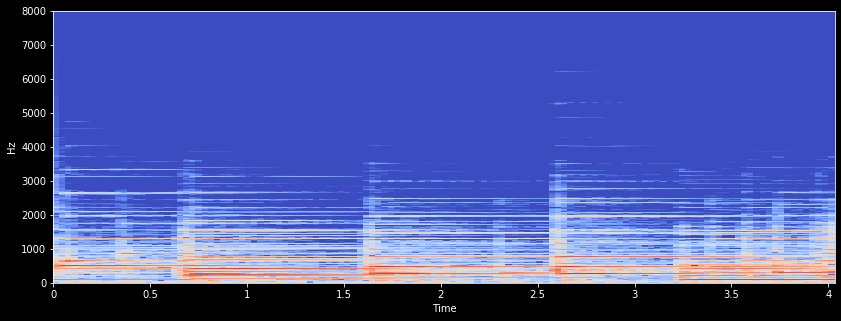

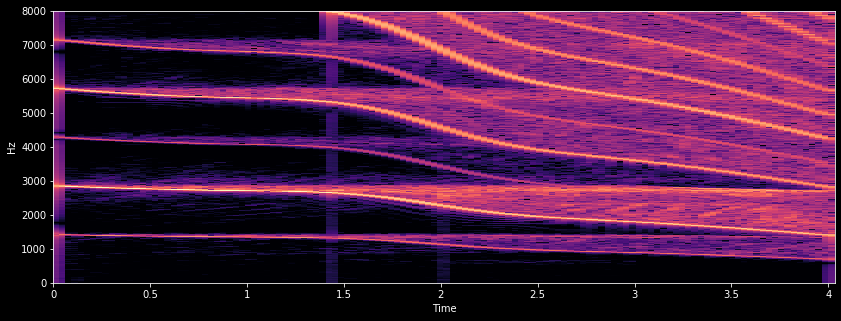

In [6]:
batch = combined_iter.getNext()
real = batch["audio"][batch_size-1]
fake = batch["audio"][0]
play(real)
play(fake)
specPlot(real)
specPlot(fake)

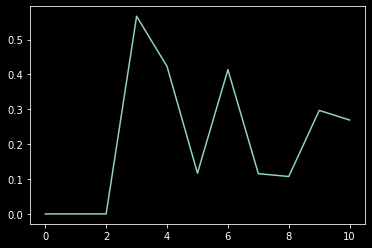

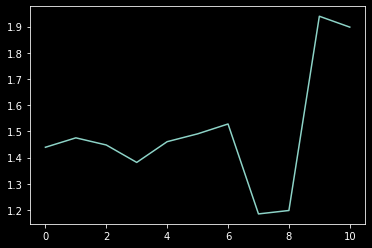

In [31]:
losses_df = pd.read_csv("./models/junk/" + "losses.csv")
plt.plot(losses_df.disc)
plt.show()
plt.plot(losses_df.gen)
plt.show()